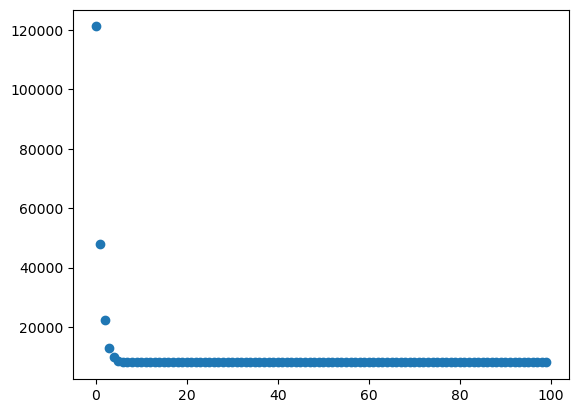

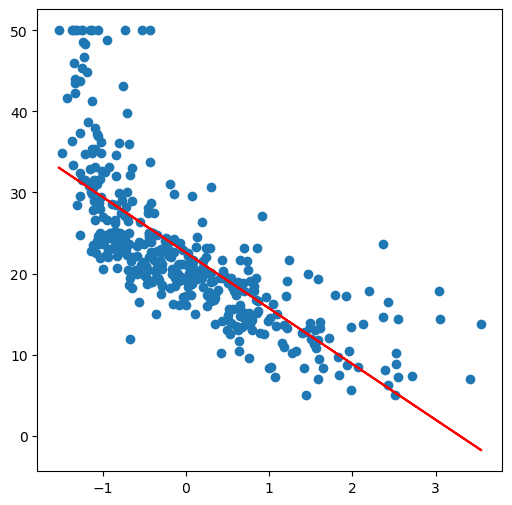

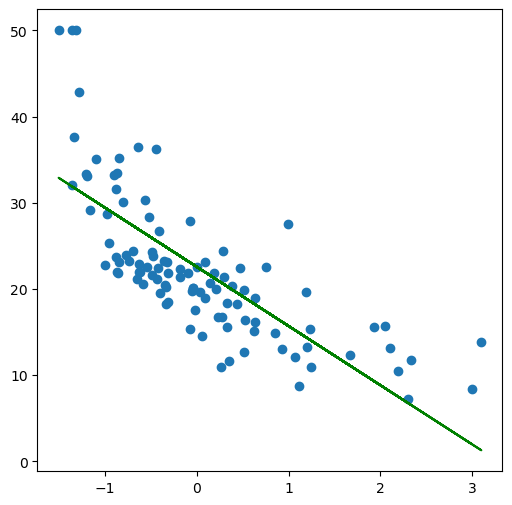

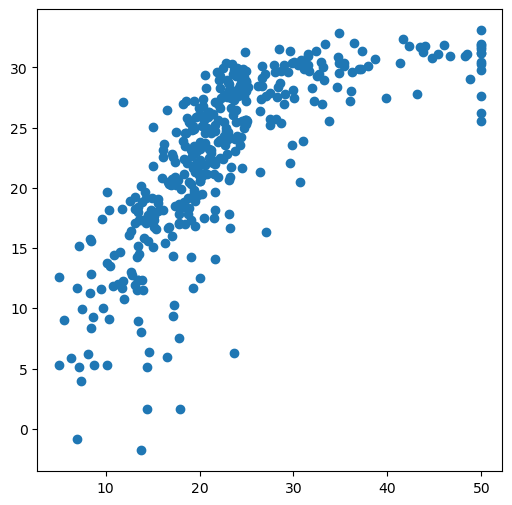

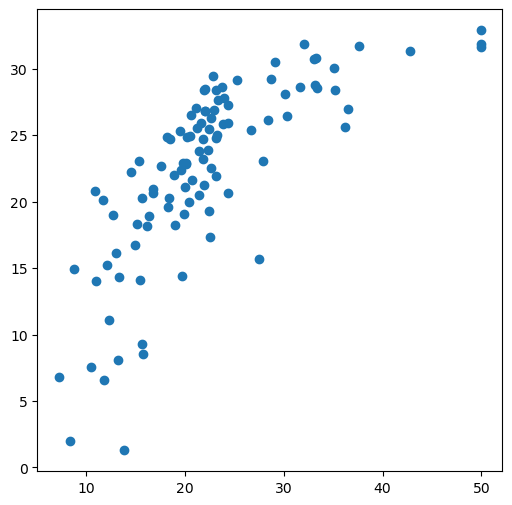

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline
 
class LinearRegression:
    
    def __init__(self, eta=0.10, epochs=50, is_verbose = False):
        
        self.eta = eta
        self.epochs = epochs
        self.is_verbose = is_verbose
        self.list_of_errors = []
        
    
    def predict(self, x):
        
        ones = np.ones((x.shape[0],1))
        x_1 = np.append(x.copy(), ones, axis=1)
        return self.get_activation(x_1) 
        
    
    def get_activation(self, x):
        
        activation = np.dot(x, self.w)
        return activation
     
    
    def fit(self, X, y):
        
        self.list_of_errors = []
        
        ones = np.ones((X.shape[0], 1))
        X_1 = np.append(X.copy(), ones, axis=1)
 
        self.w = np.random.rand(X_1.shape[1])
        
        for e in range(self.epochs):
 
            error = 0
            
            activation = self.get_activation(X_1)
            delta_w = self.eta * np.dot((y - activation), X_1)
            self.w += delta_w
                
            error = np.square(y - activation).sum()/2.0
                
            self.list_of_errors.append(error)
            
            if(self.is_verbose):
                print("Epoch: {}, weights: {}, error {}".format(
                        e, self.w, error))
                
        
 
cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS',
        'RAD','TAX','PTRATIO','B','LSTAT','MEDV']
 
data = pd.read_csv("housing.data",
                   sep=' +', engine='python', header=None, 
                   names=cols)
 
 
X = data['LSTAT'].values.reshape(-1,1)
y = data['MEDV'].values
 
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)
 
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2)
 
lr = LinearRegression(eta = 0.001, epochs=100) 
lr.fit(X_train, y_train)                
plt.scatter(range(lr.epochs), lr.list_of_errors)
 
 
plt.figure(figsize=(6, 6))
plt.scatter(X_train, y_train)
plt.plot(X_train,lr.predict(X_train), color='red')
 
plt.figure(figsize=(6, 6))
plt.scatter(X_test, y_test)
plt.plot(X_test,lr.predict(X_test), color='green')
 
 
 
plt.figure(figsize=(6, 6))
plt.scatter(y_train, lr.predict(X_train))
 
 
plt.figure(figsize=(6, 6))
plt.scatter(y_test, lr.predict(X_test))
